In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
activation_path = '/Users/hazimiasad/Documents/Work/megan/code/playground/RL-Diffusion/results/activations/sub-01/epoch_1.npy'
activation = np.load(activation_path)

In [3]:
activations = activation[0, :, :]

In [4]:
rdm = squareform(pdist(activations, metric='correlation'))

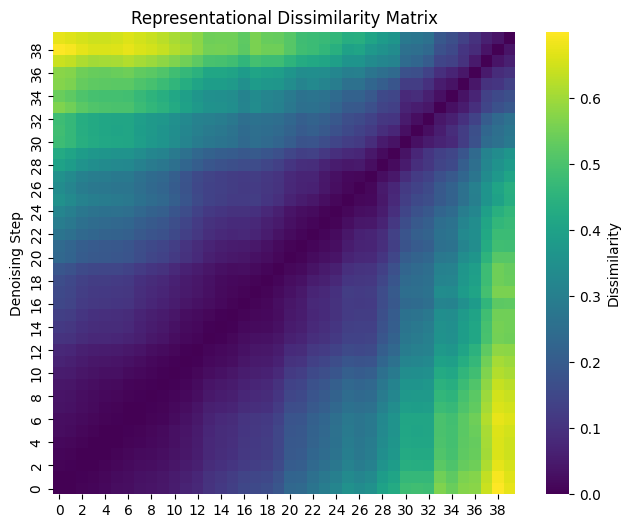

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(rdm, cmap='viridis', square=True, cbar_kws={'label': 'Dissimilarity'})
plt.title('Representational Dissimilarity Matrix')
plt.gca().invert_yaxis()
plt.ylabel('Denoising Step')
plt.show()

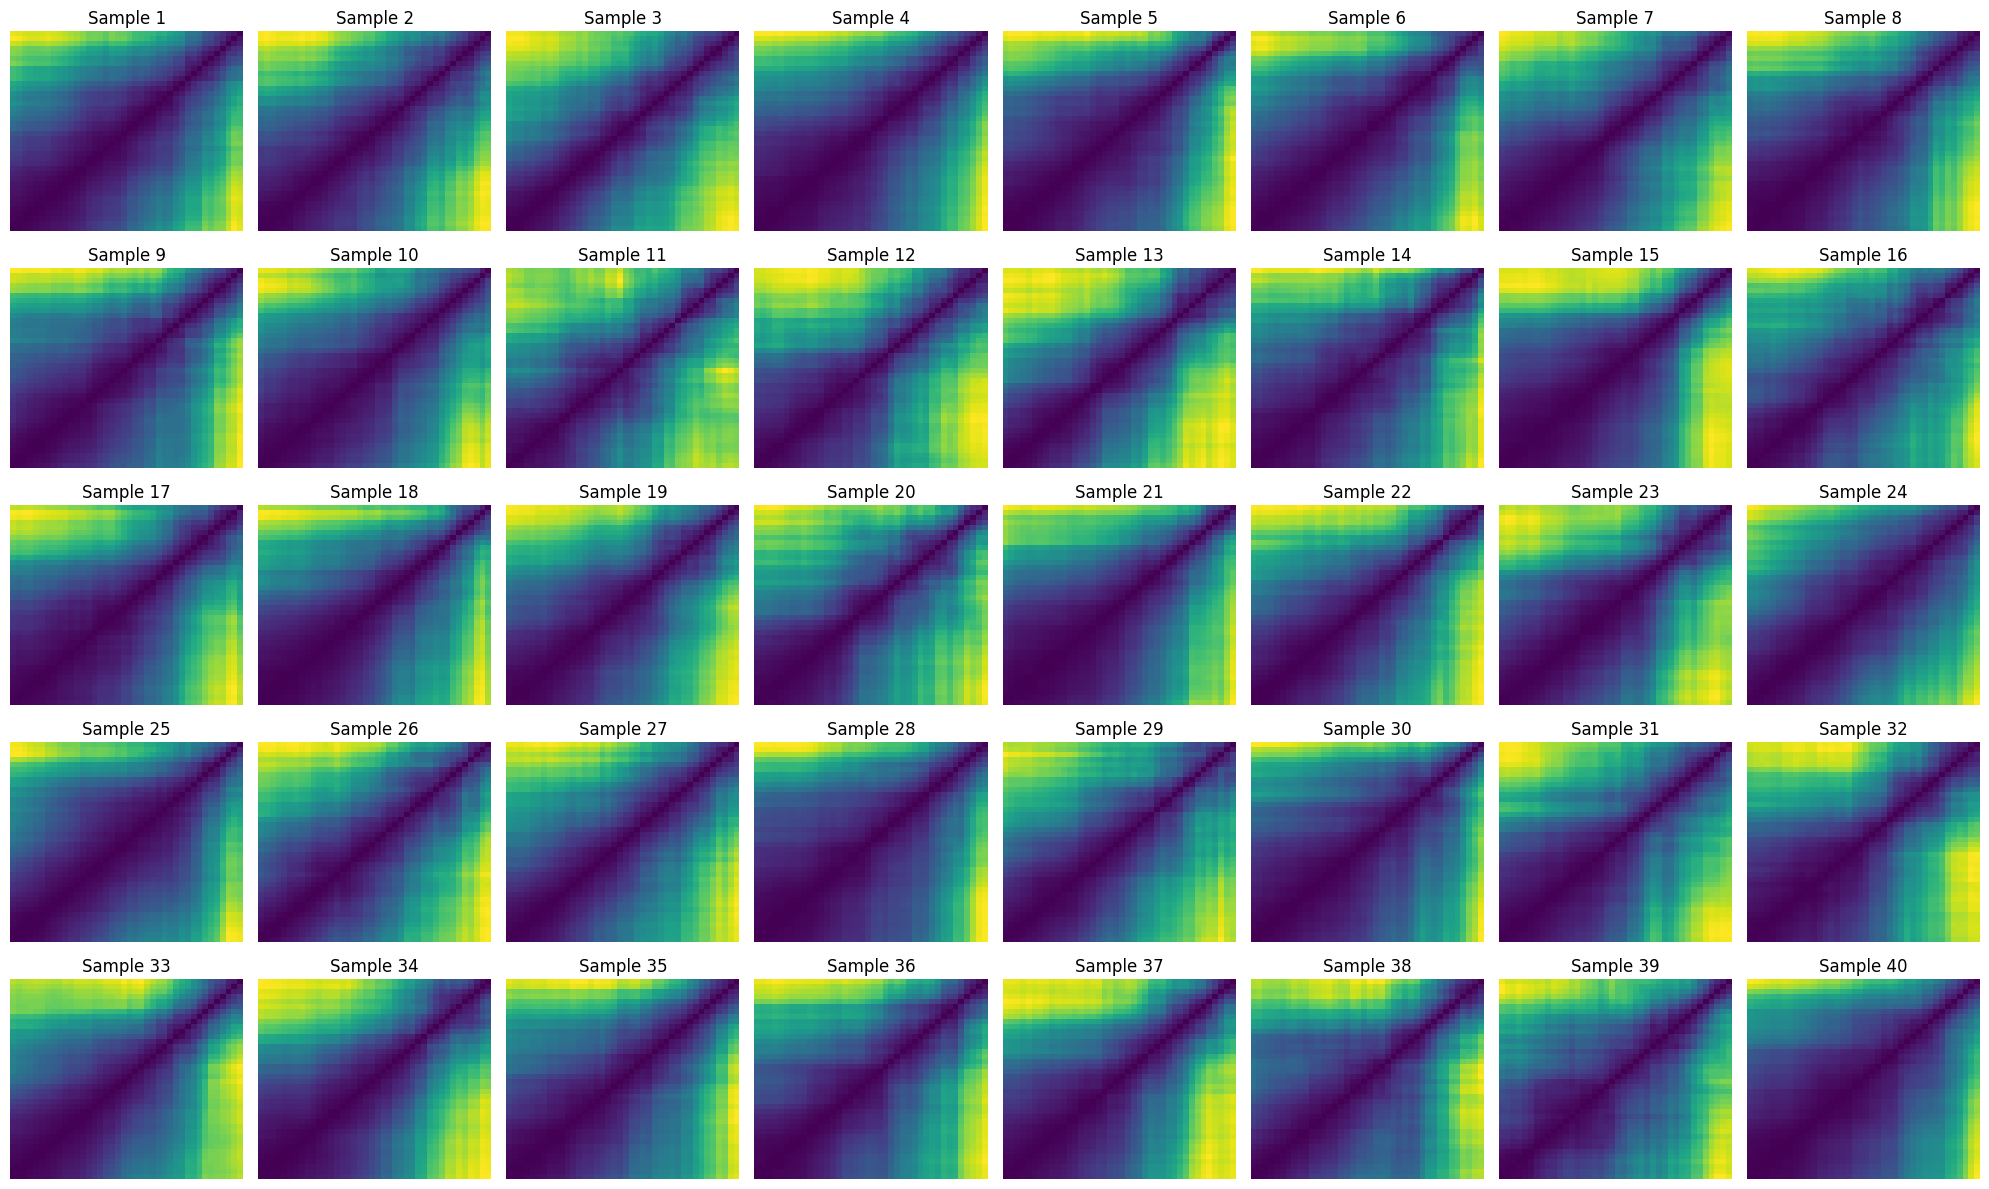

In [6]:
steps = 40  # Number of denoising steps
fig, axes = plt.subplots(5, 8, figsize=(20, 12))

for i, ax in enumerate(axes.flat):
    # Load or compute your activations for step i; assume shape (n_samples, 128)
    activations = activation[i, :, :]
    rdm = squareform(pdist(activations, metric='correlation'))
    
    sns.heatmap(rdm, cmap='viridis', ax=ax, cbar=False)
    ax.set_title(f'Sample {i+1}')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

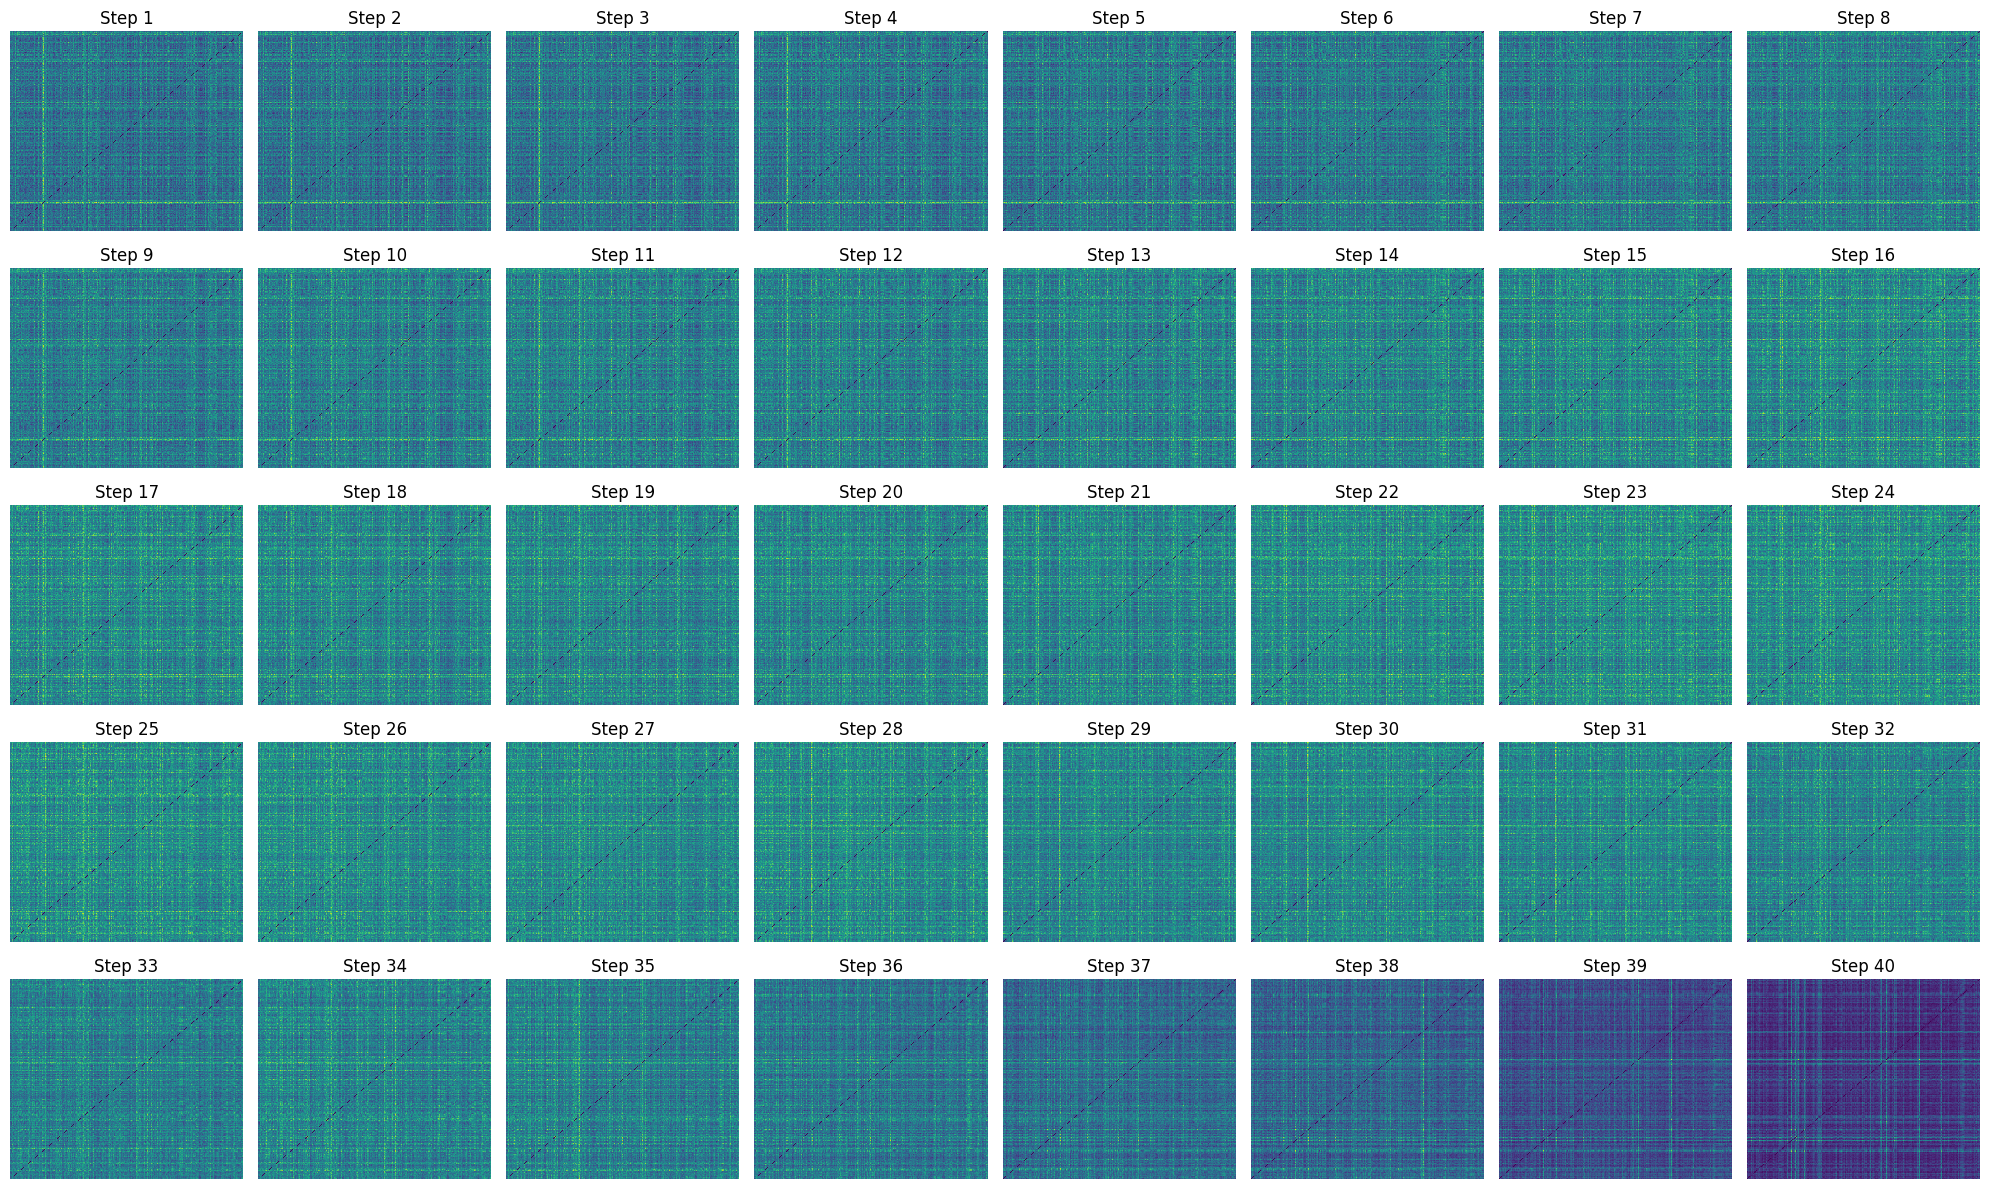

In [7]:
steps = 40  # Number of denoising steps
fig, axes = plt.subplots(5, 8, figsize=(20, 12))

for i, ax in enumerate(axes.flat):
    # Load or compute your activations for step i; assume shape (n_samples, 128)
    activations = activation[:, i, :]
    rdm = squareform(pdist(activations, metric='correlation'))
    
    sns.heatmap(rdm, cmap='viridis', ax=ax, cbar=False)
    ax.set_title(f'Step {i+1}')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(6, 5))

def animate(i):
    ax.clear()
    activations = activation[:, i, :]
    rdm = squareform(pdist(activations, metric='correlation'))
    sns.heatmap(rdm, cmap='viridis', ax=ax, cbar=False)
    ax.set_title(f'RDM at Denoising Step {i+1}')
    ax.set_xticks([])
    # plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    ax.set_yticks([])
    ax.invert_yaxis()

anim = animation.FuncAnimation(fig, animate, frames=40, interval=500)
fps = 5
anim.save(f'rdm_animation_{fps}.gif', writer='pillow', fps=fps)

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
embedding = mds.fit_transform(rdm)
plt.figure(figsize=(6, 5))
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title('MDS Projection of Activation Patterns')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform

# Number of animation frames (steps) and number of samples (for demonstration)
steps = 40
n_samples = 10
latent_dim = 128

# For demonstration, we simulate evolving latent activations.
# In your case, replace this with loading your saved activations (e.g., np.load('activations_step_{i}.npy'))
activations_over_steps = []
np.random.seed(42)
for i in range(steps):
    # Simulate activations that slowly shift over time.
    activations = activation[:, i, :]#np.random.randn(n_samples, latent_dim) + i * 0.1
    activations_over_steps.append(activations)

# Create a figure and axis for the animation
fig, ax = plt.subplots(figsize=(8, 6))
scat = ax.scatter([], [])

# Optionally set static axis labels
ax.set_xlabel("MDS Dimension 1")
ax.set_ylabel("MDS Dimension 2")

def init():
    """Initialize the plot."""
    ax.set_title("Step 0")
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    return scat,

def update(frame):
    """Update the scatter plot for frame 'frame'."""
    # Get activations for the current step
    activations = activations_over_steps[frame]
    
    # Compute the Representational Dissimilarity Matrix (RDM)
    # Here, we use Euclidean distance, but you can use other metrics (like 'correlation')
    rdm = squareform(pdist(activations, metric='euclidean'))
    
    # Use MDS to project the RDM into a 2D space
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    embedding = mds.fit_transform(rdm)
    
    # Update scatter plot data
    scat.set_offsets(embedding)
    
    # Update the title for the current step
    ax.set_title(f"Step {frame+1}")
    
    # Optionally, adjust axes limits if the points move a lot
    ax.relim()
    ax.autoscale_view()
    
    return scat,

# Create the animation object
ani = animation.FuncAnimation(fig, update, frames=steps, init_func=init,
                              blit=False, interval=500)

# Save the animation as an MP4 video file
# Ensure you have FFmpeg installed and accessible in your PATH.
fps = 8
ani.save(f"2d_plot_animation_fps_{fps}.gif", writer="pillow", fps=fps)

# To display the animation in an interactive window, uncomment the next line:
plt.show()